In [1]:
# Import required libs
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, accuracy_score
from sklearn.model_selection import GridSearchCV, ParameterGrid, KFold
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
# Read data
training_data = pd.read_csv("churn-bigml-80.csv")
test_data = pd.read_csv("churn-bigml-20.csv")

In [3]:
training_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Drop State and Area Code columns
del training_data['State']
del training_data['Area code']

del test_data['State']
del test_data['Area code']

In [5]:
# Split features and target
X_train = training_data.ix[:, 0:17]
y_train = training_data.ix[:, 17]
X_test = test_data.ix[:, 0:17]
y_test = test_data.ix[:, 17]

In [6]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00
Total night calls,2666.0,100.106152,19.418459,33.00,87.0000,100.00,113.000,166.00


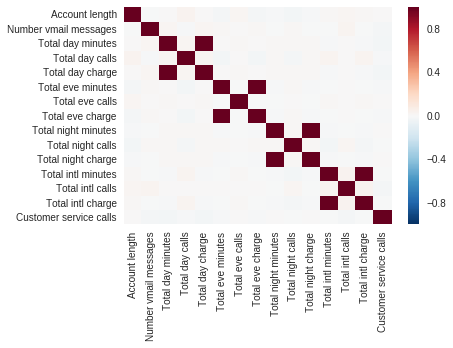

In [7]:
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix)

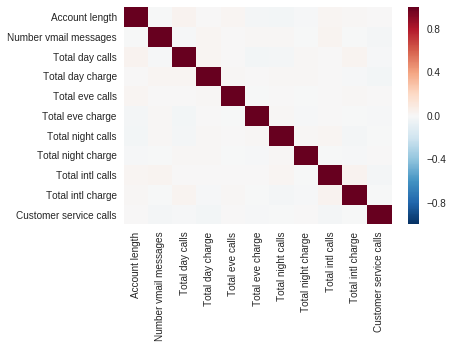

In [8]:
# Drop correlated columns
columns = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']
for column in columns:
    del X_train[column]
    del X_test[column]

# Look again to correlation matrix 
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix)

In [9]:
# Encode categorical variables
d = {'Yes':1,
     'No':0}

X_train['International plan'] = X_train['International plan'].map(d)
X_train['Voice mail plan'] = X_train['Voice mail plan'].map(d)
X_test['International plan'] = X_test['International plan'].map(d)
X_test['Voice mail plan'] = X_test['Voice mail plan'].map(d)

In [10]:
# Create classifiers
classifiers = {'linear_svm': SVC(kernel='linear'),
       'poly_svm': SVC(kernel='poly'),
       'rbf_svm': SVC(kernel='rbf'),
       'knn_clf': KNeighborsClassifier(),
       'dcs_clf': DecisionTreeClassifier(),
       'rnd_clf': RandomForestClassifier(),
       'ext_clf': ExtraTreesClassifier(),
       'sgd_clf': SGDClassifier()
      }

In [11]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Train each classifier with default parameters and look their scores
for clf in classifiers:
    classifiers[clf].fit(X_train, y_train)
    print(clf, accuracy_score(y_test, classifiers[clf].predict(X_test)))

linear_svm 0.857571214393
poly_svm 0.926536731634
rbf_svm 0.920539730135
knn_clf 0.890554722639
dcs_clf 0.91904047976
rnd_clf 0.943028485757
ext_clf 0.901049475262
sgd_clf 0.84107946027


In [13]:
# Pipeline
pipeline = Pipeline([('scaler', StandardScaler()),
                    ('rnd_clf', RandomForestClassifier())]
                   )

In [14]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rnd_clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [15]:
# Save model
joblib.dump(pipeline, 'churn.pkl') 

['churn.pkl']

In [16]:
# Load model
clf = joblib.load('churn.pkl')